___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score, precision_score, make_scorer, average_precision_score, plot_precision_recall_curve , precision_recall_curve, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.utils import class_weight

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ertad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ertad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ertad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ertad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df_copy = df.copy()

In [6]:
df = df[['Review Text', 'Recommended IND']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


### Data Wrangling

In [7]:
df.duplicated().sum()

850

In [8]:
df[df.duplicated()]

,Review Text,Recommended IND
93,NaN,1
98,NaN,1
135,NaN,1
142,NaN,1
168,NaN,1
...,...,...
23258,NaN,1
23301,NaN,1
23303,NaN,1
23470,NaN,1


In [9]:
df[(df.duplicated()) & (df['Review Text'].notnull())]

,Review Text,Recommended IND
10067,Perfect fit and i've gotten so many compliment...,1
11074,"Lightweight, soft cotton top and shorts. i thi...",1
12526,I purchased this and another eva franco dress ...,0
13354,Perfect fit and i've gotten so many compliment...,1
14275,I bought this shirt at the store and after goi...,1
21470,The sweater and skirt are so pretty! they're r...,1
21888,"Love, love these jeans. being short they come ...",1


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [10]:
df['Recommended IND'].value_counts(normalize = True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [11]:
df.rename(columns = {"Review Text": "x", "Recommended IND": "y"}, inplace = True)
df["y"] = df["y"].map({1:"recommended", 0:"not_recommended"})
df.head()

,x,y
0,Absolutely wonderful - silky and sexy and comf...,recommended
1,Love this dress! it's sooo pretty. i happene...,recommended
2,I had such high hopes for this dress and reall...,not_recommended
3,"I love, love, love this jumpsuit. it's fun, fl...",recommended
4,This shirt is very flattering to all due to th...,recommended


In [12]:
df["y"].value_counts(normalize=True)

recommended        0.822362
not_recommended    0.177638
Name: y, dtype: float64

---
---


### Missing Value Detection

In [13]:
df["x"].isnull().sum()

845

In [14]:
df.dropna(axis = 0, how = "any", inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       22641 non-null  object
 1   y       22641 non-null  object
dtypes: object(2)
memory usage: 530.6+ KB


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [16]:
negative_auxiliary_verbs = ["no", 'not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", "don't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',"needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words = stopwords.words('english')

for i in negative_auxiliary_verbs:
    if i in stop_words:
        stop_words.remove(i)

In [17]:
def cleaning(data):
  
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
       
    #9. joining
    return " ".join( text_cleaned)

In [18]:
df['cleaning_text'] = df["x"].apply(cleaning)
df.head()

,x,y,cleaning_text
0,Absolutely wonderful - silky and sexy and comf...,recommended,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,recommended,love dress sooo pretty happened find store gla...
2,I had such high hopes for this dress and reall...,not_recommended,high hope dress really wanted work initially o...
3,"I love, love, love this jumpsuit. it's fun, fl...",recommended,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,recommended,shirt flattering due adjustable front tie perf...


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [19]:
all_words_recommended = " ".join(df[df['y'] == "recommended"]['cleaning_text'])
all_words_notrecommended = " ".join(df[df['y'] == "not_recommended"]['cleaning_text'])

### Collect Words (positive and negative separately)

In [20]:
all_words_recommended[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never'

In [21]:
all_words_notrecommended[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [22]:
worldcloud_rec = WordCloud(background_color="red", max_words =250)
worldcloud_notrec = WordCloud(background_color="red", max_words =250)

In [23]:
worldcloud_rec.generate(all_words_recommended)
worldcloud_notrec.generate(all_words_notrecommended)

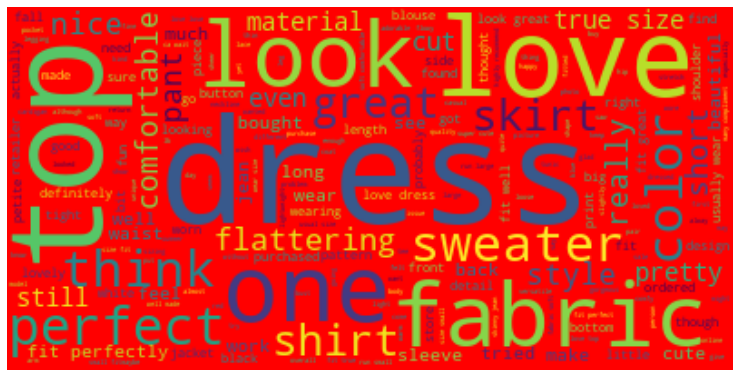

In [24]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_rec, interpolation="bilinear")
plt.axis("off")
plt.show()

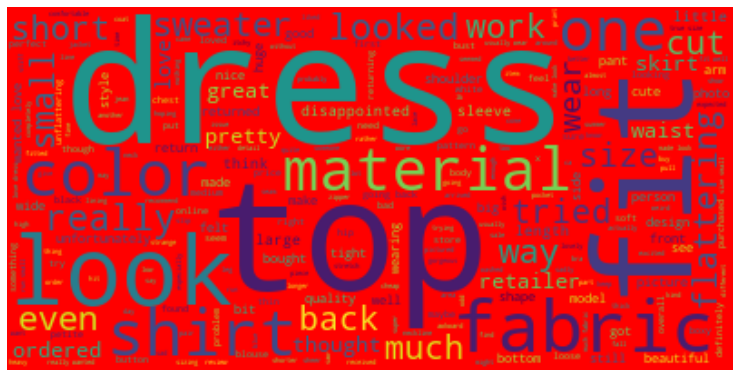

In [25]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_notrec, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [26]:
x = df["x"]
y = df["y"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [28]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(x_train)
X_test_count = vectorizer.transform(x_test)

In [29]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,...,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youre,youthful,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [31]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(x_train)
X_test_tf_idf = tf_idf_vectorizer.transform(x_test)

In [32]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,...,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youre,youthful,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

### CountVectorizer

In [34]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [35]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [36]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 708  112]
 [ 535 3174]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.57      0.86      0.69       820
    recommended       0.97      0.86      0.91      3709

       accuracy                           0.86      4529
      macro avg       0.77      0.86      0.80      4529
   weighted avg       0.89      0.86      0.87      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.60      0.90      0.72      3281
    recommended       0.97      0.87      0.92     14831

       accuracy                           0.87     18112
      macro avg       0.79      0.88      0.82     18112
   weighted avg       0.91      0.87      0.88     18112



In [37]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["not_recommended"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["not_recommended"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["not_recommended"])}

In [38]:
model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.853467
train_accuracy         0.871657
test_precision-neg     0.564547
train_precision-neg    0.597161
test_recall-neg        0.841517
train_recall-neg       0.895831
test_f1-neg            0.675505
train_f1-neg           0.716622
dtype: float64

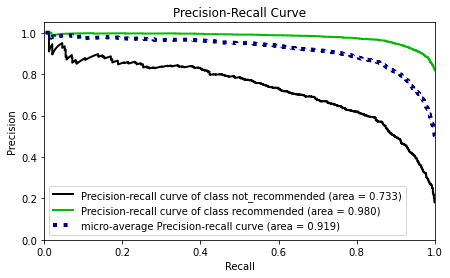

In [39]:
model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [40]:
pd.DataFrame(x_test).reset_index(drop=True).join(pd.DataFrame(y_test).reset_index(drop=True)).join(pd.DataFrame({"y_pred":log.predict(X_test_count)}).reset_index(drop=True))

,x,y,y_pred
0,"Being a 34d, i was nervous about the gaping be...",recommended,not_recommended
1,This initially caught my eye online and then i...,recommended,recommended
2,This is really cute - with a statement necklac...,recommended,recommended
3,The photo doesn't do it justice. the detail on...,recommended,recommended
4,Though the quality is good and the fabric is b...,not_recommended,not_recommended
...,...,...,...
4524,I was searching for the perfect large comfy sw...,not_recommended,recommended
4525,"I knew i wanted this top the moment i saw it, ...",recommended,recommended
4526,"I didn't love it enough to buy it, but did thi...",recommended,recommended
4527,"I am so in love with this skirt, but unfortuna...",recommended,not_recommended


In [41]:
y_test_dummies = pd.get_dummies(y_test)

y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
log_count_AP_neg = average_precision_score(y_test_dummies["not_recommended"], y_pred_proba[:, 0])

In [42]:
log_count_AP_neg

0.7328658408651438

### TF-IDF

In [43]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [44]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 668  152]
 [ 656 3053]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.50      0.81      0.62       820
    recommended       0.95      0.82      0.88      3709

       accuracy                           0.82      4529
      macro avg       0.73      0.82      0.75      4529
   weighted avg       0.87      0.82      0.84      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.51      0.82      0.63      3281
    recommended       0.95      0.82      0.88     14831

       accuracy                           0.82     18112
      macro avg       0.73      0.82      0.76     18112
   weighted avg       0.87      0.82      0.84     18112



In [45]:
model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.829340
train_accuracy         0.835959
test_precision-neg     0.517946
train_precision-neg    0.528501
test_recall-neg        0.855534
train_recall-neg       0.875783
test_f1-neg            0.645057
train_f1-neg           0.659199
dtype: float64

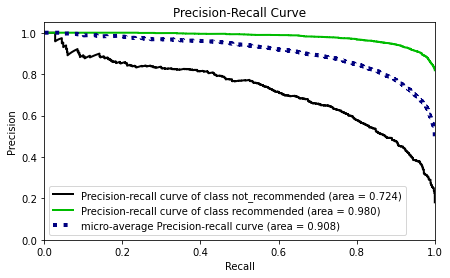

In [46]:
model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [47]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
log_tfidf_AP_neg = average_precision_score(y_test_dummies["not_recommended"], y_pred_proba[:, 0])

## Naive Bayes 

### Countvectorizer

In [48]:
weights = class_weight.compute_sample_weight(class_weight = "balanced", y = y_train)

nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train, sample_weight = weights)

MultinomialNB(alpha=10)

In [49]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 707  113]
 [ 563 3146]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.56      0.86      0.68       820
    recommended       0.97      0.85      0.90      3709

       accuracy                           0.85      4529
      macro avg       0.76      0.86      0.79      4529
   weighted avg       0.89      0.85      0.86      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.58      0.91      0.71      3281
    recommended       0.98      0.85      0.91     14831

       accuracy                           0.86     18112
      macro avg       0.78      0.88      0.81     18112
   weighted avg       0.90      0.86      0.87     18112



In [50]:
model = nb.fit(X_train_count,y_train, sample_weight = weights)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.863405
train_accuracy         0.872086
test_precision-neg     0.809352
train_precision-neg    0.847693
test_recall-neg        0.322769
train_recall-neg       0.358258
test_f1-neg            0.461076
train_f1-neg           0.503650
dtype: float64

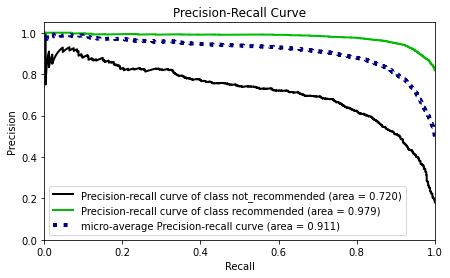

In [51]:
model = MultinomialNB(alpha=10)
model.fit(X_train_count,y_train, sample_weight = weights)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [52]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
nb_count_AP_neg = average_precision_score(y_test_dummies["not_recommended"], y_pred_proba[:, 0])

In [53]:
nb_count_AP_neg

0.7204425119134313

### TF-IDF

In [54]:
nb = MultinomialNB(alpha=10)
nb.fit(X_train_tf_idf,y_train, sample_weight = weights)

MultinomialNB(alpha=10)

In [55]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[ 718  102]
 [ 591 3118]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.55      0.88      0.67       820
    recommended       0.97      0.84      0.90      3709

       accuracy                           0.85      4529
      macro avg       0.76      0.86      0.79      4529
   weighted avg       0.89      0.85      0.86      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.57      0.91      0.70      3281
    recommended       0.98      0.85      0.91     14831

       accuracy                           0.86     18112
      macro avg       0.77      0.88      0.80     18112
   weighted avg       0.90      0.86      0.87     18112



In [56]:
model = nb.fit(X_train_tf_idf,y_train, sample_weight = weights)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.818905
train_accuracy         0.818905
test_precision-neg     0.100000
train_precision-neg    0.900000
test_recall-neg        0.000305
train_recall-neg       0.000305
test_f1-neg            0.000608
train_f1-neg           0.000609
dtype: float64

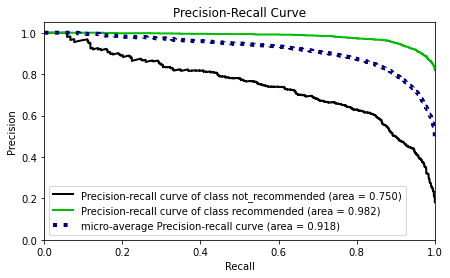

In [57]:
model = MultinomialNB(alpha=10)
model = model.fit(X_train_tf_idf,y_train, sample_weight = weights)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [58]:
y_pred = nb.predict(X_test_tf_idf)
nb_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
nb_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
nb_tf_idf_AP_neg = average_precision_score(y_test_dummies["not_recommended"], y_pred_proba[:, 0])

In [59]:
nb_tf_idf_AP_neg

0.7496282074058598

## Support Vector Machine (SVM)

### Countvectorizer

In [60]:
svc = LinearSVC(C=0.01, class_weight='balanced')
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [61]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 690  130]
 [ 481 3228]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.59      0.84      0.69       820
    recommended       0.96      0.87      0.91      3709

       accuracy                           0.87      4529
      macro avg       0.78      0.86      0.80      4529
   weighted avg       0.89      0.87      0.87      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.65      0.92      0.76      3281
    recommended       0.98      0.89      0.93     14831

       accuracy                           0.89     18112
      macro avg       0.81      0.91      0.85     18112
   weighted avg       0.92      0.89      0.90     18112



In [62]:
model = svc.fit(X_train_count,y_train)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.864675
train_accuracy         0.896263
test_precision-neg     0.590362
train_precision-neg    0.650149
test_recall-neg        0.829320
train_recall-neg       0.925226
test_f1-neg            0.689482
train_f1-neg           0.763670
dtype: float64

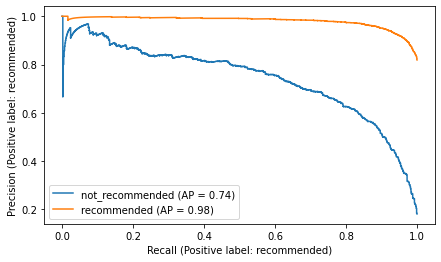

In [63]:
model = LinearSVC(C=0.01, class_weight='balanced')
model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)
    
plot_precision_recall_curve(model, X_test_count, y_test, ax = plt.gca(), name = "not_recommended", response_method = 'decision_function', pos_label = "not_recommended");
plot_precision_recall_curve(model, X_test_count, y_test, ax = plt.gca(), name = "recommended", response_method = 'decision_function', pos_label = "recommended")
plt.show();

In [64]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
svc_count_AP_neg = 0.74

### TD-IDF

In [65]:
svc = LinearSVC(C=0.01, class_weight='balanced')
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [66]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 712  108]
 [ 597 3112]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.54      0.87      0.67       820
    recommended       0.97      0.84      0.90      3709

       accuracy                           0.84      4529
      macro avg       0.76      0.85      0.78      4529
   weighted avg       0.89      0.84      0.86      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.56      0.90      0.69      3281
    recommended       0.97      0.85      0.91     14831

       accuracy                           0.86     18112
      macro avg       0.77      0.87      0.80     18112
   weighted avg       0.90      0.86      0.87     18112



In [67]:
model = svc.fit(X_train_tf_idf,y_train)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.843473
train_accuracy         0.855345
test_precision-neg     0.543062
train_precision-neg    0.563209
test_recall-neg        0.865592
train_recall-neg       0.897592
test_f1-neg            0.667168
train_f1-neg           0.692128
dtype: float64

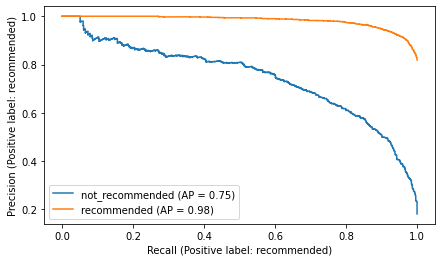

In [68]:
model = LinearSVC(C=0.01, class_weight='balanced')
model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_tf_idf)
    
plot_precision_recall_curve(model, X_test_tf_idf, y_test, ax = plt.gca(), name = "not_recommended", response_method = 'decision_function', pos_label = "not_recommended");
plot_precision_recall_curve(model, X_test_tf_idf, y_test, ax = plt.gca(), name = "recommended", response_method = 'decision_function', pos_label = "recommended")
plt.show();

In [69]:
y_pred = svc.predict(X_test_count)
svc_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
svc_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
svc_tf_idf_AP_neg = 0.75

## Random Forest

### Countvectorizer

In [70]:
rf = RandomForestClassifier(300, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [71]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 582  238]
 [ 355 3354]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.62      0.71      0.66       820
    recommended       0.93      0.90      0.92      3709

       accuracy                           0.87      4529
      macro avg       0.78      0.81      0.79      4529
   weighted avg       0.88      0.87      0.87      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.77      0.94      0.85      3281
    recommended       0.99      0.94      0.96     14831

       accuracy                           0.94     18112
      macro avg       0.88      0.94      0.90     18112
   weighted avg       0.95      0.94      0.94     18112



In [72]:
model = RandomForestClassifier(300, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True, n_jobs = -1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.871687
train_accuracy         0.941984
test_precision-neg     0.629325
train_precision-neg    0.783652
test_recall-neg        0.715336
train_recall-neg       0.939077
test_f1-neg            0.669044
train_f1-neg           0.854334
dtype: float64

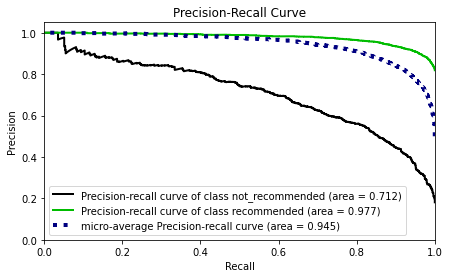

In [73]:
model = RandomForestClassifier(300, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced")
model.fit(X_train_count,y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [74]:
y_pred = nb.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
rf_count_AP_neg = average_precision_score(y_test_dummies["not_recommended"], y_pred_proba[:, 0])

In [75]:
rf_count_AP_neg

0.7124613464566188

### TF-IDF

In [76]:
rf = RandomForestClassifier(300, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [77]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 585  235]
 [ 370 3339]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.61      0.71      0.66       820
    recommended       0.93      0.90      0.92      3709

       accuracy                           0.87      4529
      macro avg       0.77      0.81      0.79      4529
   weighted avg       0.88      0.87      0.87      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.77      0.95      0.85      3281
    recommended       0.99      0.94      0.96     14831

       accuracy                           0.94     18112
      macro avg       0.88      0.94      0.91     18112
   weighted avg       0.95      0.94      0.94     18112



In [78]:
model = RandomForestClassifier(300, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True, n_jobs = -1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.862577
train_accuracy         0.941193
test_precision-neg     0.602801
train_precision-neg    0.774146
test_recall-neg        0.713815
train_recall-neg       0.953673
test_f1-neg            0.653054
train_f1-neg           0.854565
dtype: float64

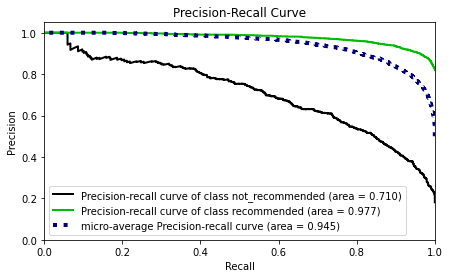

In [79]:
model = RandomForestClassifier(300, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced")
model.fit(X_train_tf_idf,y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [80]:
y_pred = nb.predict(X_test_count)
rf_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
rf_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
rf_tf_idf_AP_neg = average_precision_score(y_test_dummies["not_recommended"], y_pred_proba[:, 0])

In [81]:
rf_tf_idf_AP_neg

0.7104352990467464

## Ada Boosting

### Countvectorizer

In [82]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train, sample_weight = weights)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [83]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 647  173]
 [ 464 3245]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.58      0.79      0.67       820
    recommended       0.95      0.87      0.91      3709

       accuracy                           0.86      4529
      macro avg       0.77      0.83      0.79      4529
   weighted avg       0.88      0.86      0.87      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.64      0.89      0.74      3281
    recommended       0.97      0.89      0.93     14831

       accuracy                           0.89     18112
      macro avg       0.81      0.89      0.84     18112
   weighted avg       0.91      0.89      0.90     18112



In [84]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True, n_jobs = -1, fit_params={"sample_weight" : weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.856780
train_accuracy         0.890981
test_precision-neg     0.578248
train_precision-neg    0.643869
test_recall-neg        0.780860
train_recall-neg       0.891056
test_f1-neg            0.664011
train_f1-neg           0.747556
dtype: float64

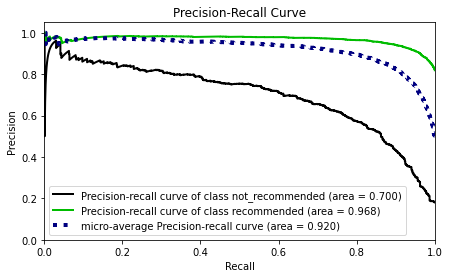

In [85]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
model.fit(X_train_count,y_train, sample_weight = weights)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [86]:
y_pred = nb.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
ada_count_AP_neg = average_precision_score(y_test_dummies["not_recommended"], y_pred_proba[:, 0])

In [87]:
ada_count_AP_neg

0.699665916857177

### TF-IDF

In [88]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train, sample_weight = weights)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [89]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_count)

Ada MODEL
[[ 527  293]
 [ 449 3260]]
Test_Set
                 precision    recall  f1-score   support

not_recommended       0.54      0.64      0.59       820
    recommended       0.92      0.88      0.90      3709

       accuracy                           0.84      4529
      macro avg       0.73      0.76      0.74      4529
   weighted avg       0.85      0.84      0.84      4529

Train_Set
                 precision    recall  f1-score   support

not_recommended       0.67      0.91      0.77      3281
    recommended       0.98      0.90      0.94     14831

       accuracy                           0.90     18112
      macro avg       0.82      0.91      0.85     18112
   weighted avg       0.92      0.90      0.91     18112



In [90]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True, n_jobs = -1, fit_params={"sample_weight" : weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.848277
train_accuracy         0.906692
test_precision-neg     0.562334
train_precision-neg    0.678839
test_recall-neg        0.739101
train_recall-neg       0.920451
test_f1-neg            0.638431
train_f1-neg           0.781384
dtype: float64

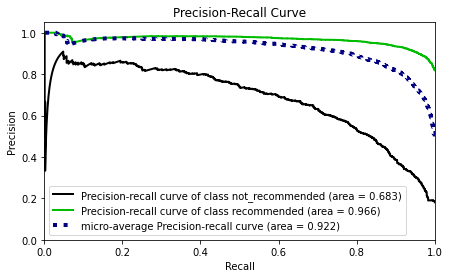

In [91]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
model.fit(X_train_tf_idf,y_train, sample_weight = weights)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [92]:
y_pred = nb.predict(X_test_tf_idf)
ada_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = ["not_recommended"], average = None)
ada_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = ["not_recommended"], average = None)
ada_tf_idf_AP_neg = average_precision_score(y_test_dummies["not_recommended"], y_pred_proba[:, 0])

In [93]:
ada_tf_idf_AP_neg

0.6832009420346123

## DL modeling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df[['Review Text', 'Recommended IND']]
df.rename(columns = {"Review Text": "x", "Recommended IND": "y"}, inplace = True)
df["y"] = df["y"].map({1:0, 0:1})
df.dropna(axis = 0, how = "any", inplace = True)
df.head()

### Tokenization

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(df['x'])

### Creating word index

In [ ]:
print({k: tokenizer.word_index[k] for k in list(tokenizer.word_index)[:10]})
print({k: tokenizer.word_index[k] for k in list(tokenizer.word_index)[-10:]})

{'the': 1, 'i': 2, 'and': 3, 'a': 4, 'it': 5, 'is': 6, 'this': 7, 'to': 8, 'in': 9, 'but': 10}
{'33b': 14838, 'bett': 14839, 'daker': 14840, 'bottome': 14841, 'peitte': 14842, "donse't": 14843, 'population': 14844, 'camoflauges': 14845, 'blaring': 14846, 'platinum': 14847}


In [ ]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(df['x'])

In [ ]:
X_num_tokens[:3]

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


In [ ]:
df['x'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [ ]:
tokenizer.word_index["comfortable"]

68

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
num_tokens

array([ 7, 62, 97, ..., 42, 85, 19])

In [ ]:
num_tokens.mean(), num_tokens.max(), num_tokens.argmax()

(60.60699615741354, 116, 16263)

In [ ]:
np.quantile(num_tokens, 0.95)

102.0

In [ ]:
sum(num_tokens <= 102) / len(num_tokens)

0.9564948544675589

In [ ]:
sum(num_tokens <= 102)

21656

In [ ]:
len(num_tokens)

22641

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=102)
X_pad.shape

(22641, 102)

### Train Set Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, df['y'], test_size=0.2, stratify=df['y'], random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18112, 102), (4529, 102), (18112,), (4529,))

### Modeling

In [ ]:
model = Sequential()
embedding_size = 50

In [ ]:
model.add(Embedding(input_dim=14848,
                    output_dim=embedding_size,
                    input_length=102))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.008)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 102, 50)           742400    
                                                                 
 dropout (Dropout)           (None, 102, 50)           0         
                                                                 
 gru (GRU)                   (None, 102, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 102, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 102, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 102, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           patience = 1, restore_best_weights=True)

In [ ]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
71/71 [==============================] - 8s 40ms/step - loss: 0.6253 - recall: 0.6294 - val_loss: 0.4228 - val_recall: 0.7500
Epoch 2/10
71/71 [==============================] - 2s 27ms/step - loss: 0.3858 - recall: 0.8555 - val_loss: 0.4229 - val_recall: 0.9134
Epoch 3/10
71/71 [==============================] - 2s 27ms/step - loss: 0.2633 - recall: 0.9147 - val_loss: 0.2951 - val_recall: 0.8159


In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.625272,0.629381,0.422774,0.750000
1,0.385763,0.855532,0.422899,0.913415
2,0.263293,0.914660,0.295130,0.815854


<AxesSubplot: >

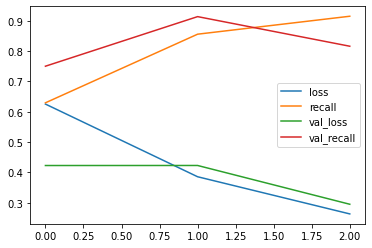

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 2s 12ms/step - loss: 0.4229 - recall: 0.9134


[0.42290356755256653, 0.9134146571159363]

In [ ]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 6s 10ms/step - loss: 0.3391 - recall: 0.9598


[0.33907049894332886, 0.9597683548927307]

In [ ]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 2s 11ms/step
[[2913  796]
 [  71  749]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      3709
           1       0.48      0.91      0.63       820

    accuracy                           0.81      4529
   macro avg       0.73      0.85      0.75      4529
weighted avg       0.89      0.81      0.83      4529



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 6s 10ms/step
[[12350  2481]
 [  132  3149]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14831
           1       0.56      0.96      0.71      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.90      0.81     18112
weighted avg       0.91      0.86      0.87     18112



142/142 [==============================] - 2s 11ms/step


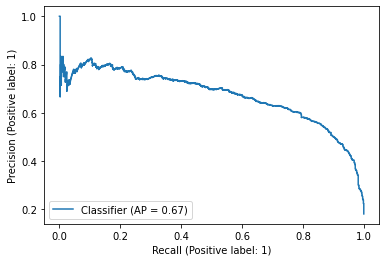

In [ ]:
y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.671321090922031

In [94]:
dl_rec_neg = 0.9134
dl_f1_neg = 0.63
dl_AP_neg = 0.671321090922031

## BERT Modeling

In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

### Read Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df[['Review Text', 'Recommended IND']]
df.rename(columns = {"Review Text": "x", "Recommended IND": "y"}, inplace = True)
df["y"] = df["y"].map({1:0, 0:1})
df.dropna(axis = 0, how = "any", inplace = True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Clothing ID,Age,Title,x,Rating,y,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,1,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,0,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,1,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,0,1,General Petite,Tops,Knits


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2, stratify=df['y'], random_state=0)

### Tokenization

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Fixing token counts of all documents

In [8]:
max_token = []
for sent in df['x']:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [9]:
np.array(max_token).mean(), np.array(max_token).max(), np.array(max_token).argmax()

(79.16580205472485, 162, 15733)

In [16]:
max_length = int(np.quantile(np.array(max_token), 0.95))
max_length

129

In [17]:
sum(np.array(max_token) <= max_length) / len(max_token)

0.9529549384599736

### Transformation Vectors to Matrices

In [18]:
def transformation(X):
  # set array dimensions
  seq_len = max_length

  # input_ids'ler için Xids boş listesini, attention_mask'ler için Xmask boş listesini oluşturuyoruz.
  Xids = []
  Xmask = []

    
  for sentence in X: # corpustan tüm yorumları sırayla çekiyoruz.

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # her bir yoruma karşılık gelen input_ids vektörünü Xids listesine append ediyoruz.
      Xmask.append(tokens['attention_mask']) # her bir yoruma karşılık gelen attention_mask vektörünü Xmask append ediyoruz.

  return np.array(Xids), np.array(Xmask) # Xids ve Xmask listelerini np.array ile (yorum sayısı, 160) boyutlarında matrixlere dönüştürüyoruz.

In [19]:
Xids_train, Xmask_train = transformation(X_train)

# Train setimiz için 2 ayrı matriximizi düzenliyoruz.

Xids_test, Xmask_test = transformation(X_test)
# Test setimiz için de 2 ayrı matriximizi düzenliyoruz.

In [20]:
Xids_train

array([[ 101, 1045, 5373, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0],
       [ 101, 1045, 7078, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2428, ...,    0,    0,    0],
       [ 101, 2428, 3866, ...,    0,    0,    0],
       [ 101, 2200, 2367, ...,    0,    0,    0]])

In [21]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (15729, 129)
Xmask_train.shape : (15729, 129)
Xids_test.shape   : (3933, 129)
Xmask_test.shape  : (3933, 129)


In [22]:
np.array(y_train)

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
labels_train = np.array(y_train).reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
np.array(y_test)

array([0, 0, 0, ..., 0, 1, 1])

In [25]:
labels_test = np.array(y_test).reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [26]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(129,), dtype=tf.int64, name=None), TensorSpec(shape=(129,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [27]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(129,), dtype=tf.int64, name=None), TensorSpec(shape=(129,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [28]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [29]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func) 

In [30]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(129,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(129,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [31]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(129,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(129,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [32]:
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [33]:
train_ds

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 129), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 129), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [34]:
!pip install -q tf-models-official

In [35]:
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

1476
147


### Creating optimization

In [36]:
from official.nlp import optimization
epochs = 3
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw') 

### Creating Model

In [37]:
def create_model():
    from transformers import TFAutoModel
    # BERTTürk modeli sadece pytorch tensörleri üzerinden eğitildiğinden modelin Tensorflow kütüphanesi ile çalışabilmesi için AutoModel yerine TFAutoModel yazıyoruz.
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased") 
    # Notebookun yeralan huggingface bert türk linkinden model kurma işlemlemleri için gerekli olan kodları aynen alıyoruz.
    # Tokenization işlemleri "dbmdz/bert-base-turkish-uncased" ile yapıldığından eğitimide "dbmdz/bert-base-turkish-uncased" ile yapmamız gerekiyor. 
    # "dbmdz/bert-base-turkish-cased" ile eğitim yapılırsa sonuçlarımız kötü çıkacaktır.

    input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32')
    # inputlarımız token embeddings (input_ids) ve position embeddings (attention_mask)'den oluştuğundan herbiri için bir input layer oluşturuyoruz.
    # Her bir gözlem için input layerlarımızın boyutlarını (shape= (160,)) veriyoruz.
    # modelin bu layerları biribirinden ayırt edebilmesi için name olarak map_func fonksiyonu içinde belirlediğimiz isimleri kullanıyoruz. Farklı isimler kullanılırsa model 
    # hata döndürür.
    # BERT modelleri dtype= "int32" olarak çalışır. Bu sebeple dtype="int32" olarak belirtiyoruz.

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
    # embeddings layer, BERT model üzerinde daha önce eğitilip hafızasında tutulan word embeddingleri çektiğimiz katmandır.
    # Çekilen Word embeddingler birleştirilerek sentence embeddinglere dönüştürülür. 
    # Elde ettiğimiz sentence embeddinglerin olumlu mu olumsuz mu olduğuna dair eğitimimizi Dense layer üzerinde yapacağız.

    x = Dense(max_length, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x) #0.1 oranı developerlar tarafından tavsiye edilen orandır.
    y = Dense(1, activation='sigmoid', name='outputs')(x) # outputumuz döndürüyor.

    # Dikkat ettiyseniz burda Sequential API yerine Functional API kullanıyoruz. 
    # Functional API'de bir önceki layerdaki bilgileri bir sonraki layera aktarma işlemini aktarma yapacağımız layerdan sonra bir tuple açıp içerisine bir önceki layerın ismini 
    # yazarak yapıyoruz.
    # Embeddings layerdan elde ettiğimiz sentence embeddingsleri Dense layer'a göndermek için Dense() layerdan sonra bir tuple açıp içerisine bir önceki layerın ismini yazıyoruz
    # Aynen burda olduğu gibi "Dense(160, activation='relu')(embeddings)". Bu sayede embeddings layerdaki bilgiler Dense layera aktarılmış oldu.
    # Hatırlarsanız bu işlem Sequential API'de model.add(embeddings) olarak yapılıyordu.

    return Model(inputs=[input_ids, attention_mask], outputs=y)
    # son aşamada elde ettiğimiz input ve outputlar Model fonksiyonu içine tanımlanır.

# modeli bir fonksiyon içinde kurma sebebimiz aşağıdaki strategy.scope() kapsamında yapacağımız işlemlerin daha sade görünmesi için yoksa burdaki tüm kodları strategy.scope() 
# altında yazmamız gerekecekti.

In [38]:
# strategy değişkenine atanan 8 TPU çekirdeğinin hızından faydalanarak yapmak istediğimiz tüm işlemleri with strategy.scope() kod bloğunun 
# altında tanımlıyoruz.

with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = optimizer
  #optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) ==> yukarıda tanımladığımız optimizer'ı kullanmasaydık bu şekilde de optimizer'ı tanımlayabilirdik. 
  # Ama çok rahat overfiting olma riski vardır
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

  # Aşağıda çıkan uyarı önemli değildir. Classification tasklerinde modelin eğitim aşamasında Next Sentence Prediction(NSP) katmanını kullanmayacağı
  # bilgisi veriliyor.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [39]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 129)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 129)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 129,                                           

### Model Fiting

In [40]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight= {0:0.61061291, 1:2.76013411})

Epoch 1/3
492/492 [==============================] - 203s 225ms/step - loss: 0.5171 - recall: 0.8266 - val_loss: 0.4412 - val_recall: 0.9175
Epoch 2/3
492/492 [==============================] - 52s 106ms/step - loss: 0.4104 - recall: 0.8769 - val_loss: 0.3059 - val_recall: 0.7818
Epoch 3/3
492/492 [==============================] - 53s 107ms/step - loss: 0.3535 - recall: 0.9045 - val_loss: 0.4149 - val_recall: 0.8294


### Model evaluation

In [41]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.517125,0.826573,0.441210,0.917482
1,0.410374,0.876923,0.305926,0.781818
2,0.353514,0.904545,0.414913,0.829371


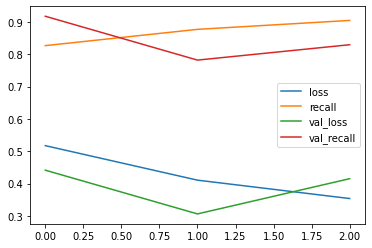

In [42]:
model_loss.plot()

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

123/123 [==============================] - 16s 74ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3218
           1       0.75      0.83      0.79       715

    accuracy                           0.92      3933
   macro avg       0.86      0.88      0.87      3933
weighted avg       0.92      0.92      0.92      3933



In [44]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred)) 

492/492 [==============================] - 20s 38ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     12869
           1       0.87      0.90      0.89      2860

    accuracy                           0.96     15729
   macro avg       0.92      0.94      0.93     15729
weighted avg       0.96      0.96      0.96     15729



123/123 [==============================] - 5s 30ms/step


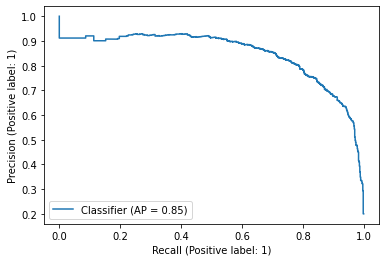

In [45]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score
average_precision_score(y_test, y_pred_proba)

0.8477459148866519

In [95]:
bert_rec_neg = 0.8294
bert_f1_neg = 0.79
bert_AP_neg = 0.8477459148866519

### Conclusion

In [103]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tf_idf", "LogReg_tf_idf", "SVM_tf_idf", 
                                  "Random Forest_tf_idf", "AdaBoost_tf_idf", "DL", "BERT"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tf_idf_f1_neg[0], log_tfidf_f1_neg[0], svc_tf_idf_f1_neg[0], rf_tf_idf_f1_neg[0], ada_tf_idf_f1_neg[0], dl_f1_neg, bert_f1_neg],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0], nb_tf_idf_rec_neg[0], log_tfidf_rec_neg[0], svc_tf_idf_rec_neg[0], rf_tf_idf_rec_neg[0], ada_tf_idf_rec_neg[0], dl_rec_neg, bert_rec_neg],
                        
                        "Average_Precision_Score_Negative": [nb_count_AP_neg, log_count_AP_neg, svc_count_AP_neg, rf_count_AP_neg, ada_count_AP_neg, nb_tf_idf_AP_neg, log_tfidf_AP_neg, svc_tf_idf_AP_neg, rf_tf_idf_AP_neg, ada_tf_idf_AP_neg, dl_AP_neg, bert_AP_neg]})

compare

,Model,F1_Score_Negative,Recall_Score_Negative,Average_Precision_Score_Negative
0,NaiveBayes_count,0.676555,0.862195,0.720443
1,LogReg_count,0.686379,0.863415,0.732866
2,SVM_count,0.693119,0.841463,0.740000
3,Random Forest_count,0.690335,0.853659,0.712461
4,AdaBoost_count,0.690335,0.853659,0.699666
5,NaiveBayes_tf_idf,0.674495,0.875610,0.749628
6,LogReg_tf_idf,0.643773,0.857317,0.724045
7,SVM_tf_idf,0.648754,0.809756,0.750000
8,Random Forest_tf_idf,0.690335,0.853659,0.710435
9,AdaBoost_tf_idf,0.674495,0.875610,0.683201


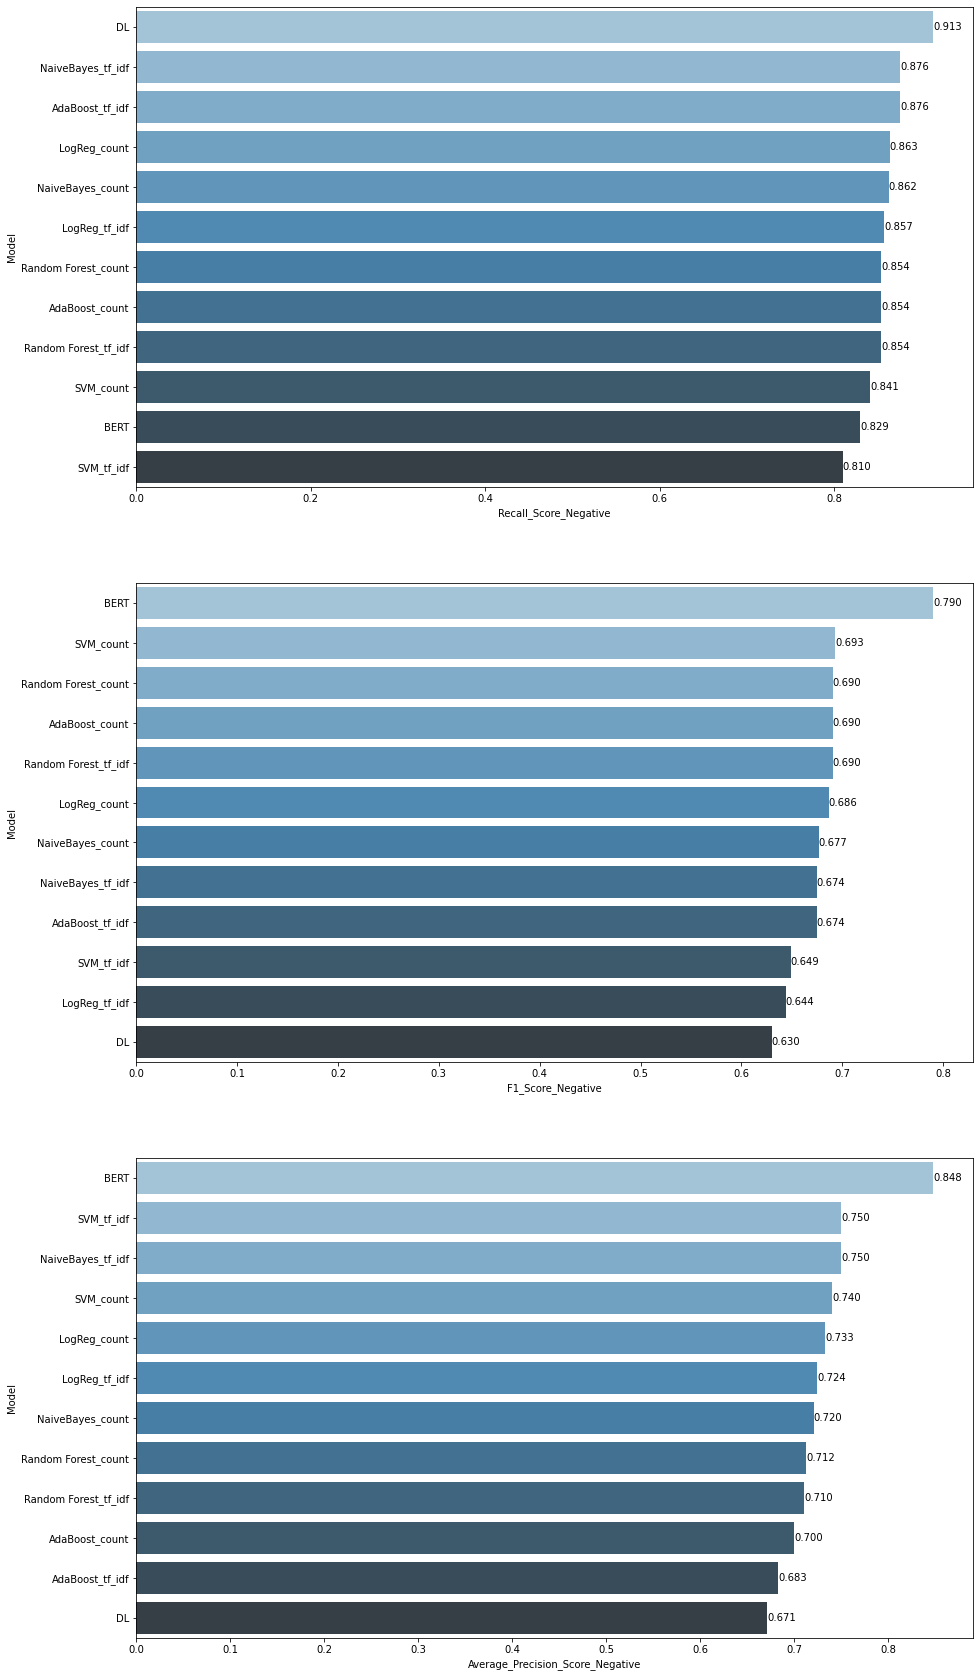

In [104]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")            
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

BERT is the best model according to the results

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___